In [2]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/fb/59/3eb58629e3749d9f4fc1e522487af369f9bd4c451f465d3054961fab6bf8/tensorflow-2.13.1-cp38-cp38-win_amd64.whl.metadata
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/5b/6f/8b125d126d54061c0be610b135aaf2f8960f55c2e185ac32445e4a5012d5/tensorflow-2.13.0-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/38/ba/dd4d998a852451e98dc009ecb208bbb0eeb0c8252dc35b7c4e1050762b36/tensorflow_intel-2.13.0-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.w

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydantic 2.4.2 requires typing-extensions>=4.6.1, but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.10.1 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.


In [4]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/a3/14/18b715f21ec8b511e47771197c7d1ef74d20b1c802ad6effb5ec4dfbfe72/matplotlib-3.7.4-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/96/1b/b05cd42c8d21767a0488b883b38658fb9a45f86c293b7b42521a8113dc5d/contourpy-1.1.1-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/67/32/2d77c11b8f077d87edb5a6290a369fe52f97af60190b51da8d80f821a6dd/fonttools-4.47.0-cp38-cp38-win_amd64.whl.metadata
     ---------------------------------------- 0.0/160.4 kB ? eta -:--:--
     -- ---

In [316]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [317]:
IMAGE_SIZE=48
BATCH_SIZE=32
CHANNELS=1
EPOCHS=50

In [318]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "D://Potato_Disease//training",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode="grayscale"  # Set color_mode to "grayscale"
)


Found 2152 files belonging to 3 classes.


In [319]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [320]:
len(dataset)

68

In [321]:
68*32

2176

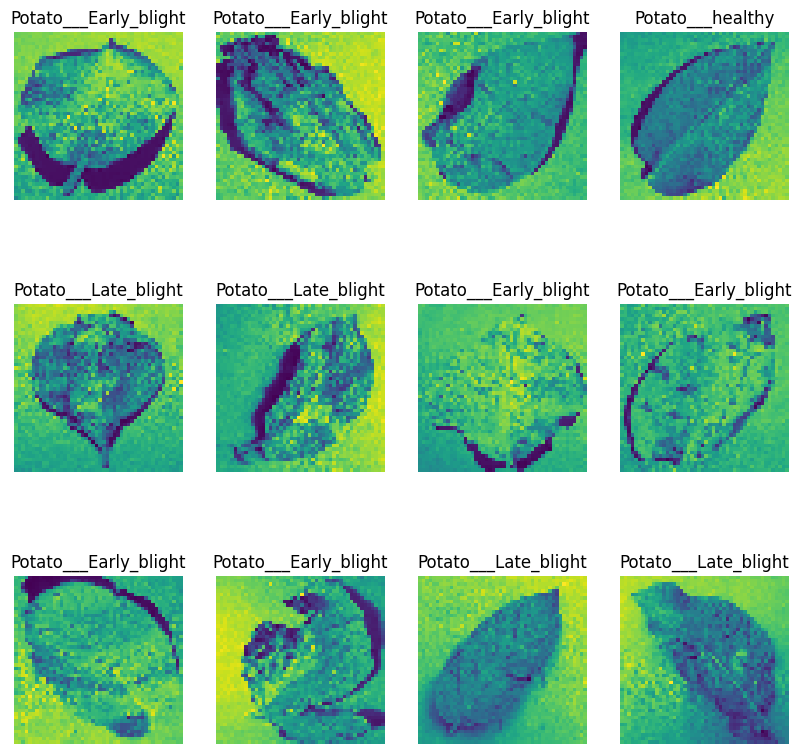

In [322]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.title(class_names[label_batch[i]])
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")


In [323]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [324]:
train_ds=dataset.take(54)
len(train_ds)

54

In [325]:
test_ds=dataset.skip(54)

In [326]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [327]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [328]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [329]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [330]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [331]:
len(train_ds)

54

In [332]:
len(val_ds)

6

In [333]:
len(test_ds)

8

In [334]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [335]:
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [336]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [337]:
dat_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [340]:
model.fit(
train_ds,
epochs=15,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/15
54/54 [==============================] - 43s 200ms/step - loss: 2.0754 - accuracy: 0.5203 - val_loss: 0.8208 - val_accuracy: 0.6667
Epoch 2/15
54/54 [==============================] - 5s 99ms/step - loss: 0.7695 - accuracy: 0.6823 - val_loss: 0.7142 - val_accuracy: 0.6771
Epoch 3/15
54/54 [==============================] - 5s 101ms/step - loss: 0.6054 - accuracy: 0.7731 - val_loss: 0.6097 - val_accuracy: 0.7500
Epoch 4/15
54/54 [==============================] - 6s 107ms/step - loss: 0.4675 - accuracy: 0.8275 - val_loss: 0.4324 - val_accuracy: 0.8125
Epoch 5/15
54/54 [==============================] - 6s 101ms/step - loss: 0.4297 - accuracy: 0.8304 - val_loss: 0.3751 - val_accuracy: 0.8333
Epoch 6/15
54/54 [==============================] - 5s 97ms/step - loss: 0.3422 - accuracy: 0.8686 - val_loss: 0.3433 - val_accuracy: 0.8490
Epoch 7/15
54/54 [==============================] - 5s 89ms/step - loss: 0.3347 - accuracy: 0.8698 - val_loss: 0.4198 - val_accuracy: 0.8385
Epoch 8/

In [41]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [338]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [339]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [341]:
model.save('D:/Potato_Disease/POTATO.h5')